In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [251]:
data = pd.read_csv('/content/sample_data/Salary_Dataset_with_Extra_Features.csv')

In [167]:
data.head()

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android


In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22770 entries, 0 to 22769
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rating             22770 non-null  float64
 1   Company Name       22770 non-null  object 
 2   Job Title          22770 non-null  object 
 3   Salary             22770 non-null  int64  
 4   Salaries Reported  22770 non-null  int64  
 5   Location           22770 non-null  object 
 6   Employment Status  22770 non-null  object 
 7   Job Roles          22770 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 1.4+ MB


In [169]:
data

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [178]:
for i in data.columns:
  if data[i].dtype == 'object':
    print(i, data[i].nunique(),data[i].unique())
    print()

Company Name 11261 ['Sasken' 'Advanced Millennium Technologies' 'Unacademy' ...
 'Unicon Systems' 'Expert Solutions' 'Nextgen Innovation Labs']

Job Title 1080 ['Android Developer' 'Android Developer - Intern'
 'Android Developer - Contractor' ... 'Web Developer Contractor'
 'Full Stack Web Developer' 'Associate Web Developer']

Location 10 ['Bangalore' 'Chennai' 'Hyderabad' 'New Delhi' 'Pune' 'Jaipur' 'Kerala'
 'Kolkata' 'Madhya Pradesh' 'Mumbai']

Employment Status 4 ['Full Time' 'Intern' 'Contractor' 'Trainee']

Job Roles 11 ['Android' 'Backend' 'Database' 'Frontend' 'IOS' 'Java' 'Mobile' 'SDE'
 'Python' 'Web' 'Testing']



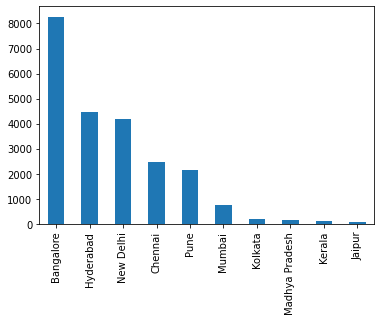

In [179]:
data['Location'].value_counts().plot(
    kind='bar'
)

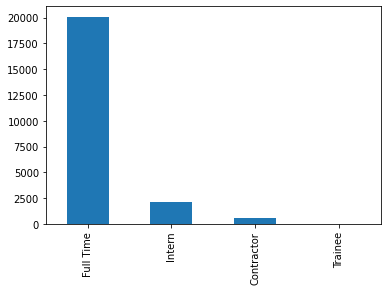

In [180]:
data['Employment Status'].value_counts().plot(
    kind='bar'
)

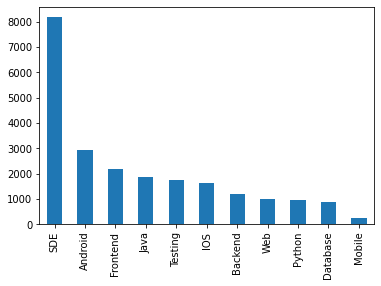

In [181]:
data['Job Roles'].value_counts().plot(
    kind='bar'
)

In [217]:
def q1(x):
    return x.quantile(0.25)

# 90th Percentile
def q3(x):
    return x.quantile(0.75)

In [222]:
quantiles = data.groupby('Job Roles').agg(
    Q1=('Salary',q1),
    Q3=('Salary',q3),
    max=('Salary',np.max),
    min = ('Salary',np.min)
)

In [224]:
quantiles['IQL'] = quantiles['Q3']-quantiles['Q1']

In [226]:
quantiles['Range'] = quantiles['max']-quantiles['min']

In [229]:
quantiles

,Q1,Q3,max,min,IQL,Range
Job Roles,,,,,,
Android,252000.0,700000.0,7100000,12000,448000.0,7088000
Backend,255000.0,1000000.0,5200000,24000,745000.0,5176000
Database,500000.0,1200000.0,10000000,100000,700000.0,9900000
Frontend,252000.0,800000.0,10000000,12000,548000.0,9988000
IOS,336000.0,900000.0,5200000,12000,564000.0,5188000
Java,252000.0,700000.0,10000000,8448,448000.0,9991552
Mobile,300000.0,1056000.0,9600000,60000,756000.0,9540000
Python,228000.0,600000.0,6900000,24000,372000.0,6876000
SDE,384000.0,1100000.0,90000000,12000,716000.0,89988000


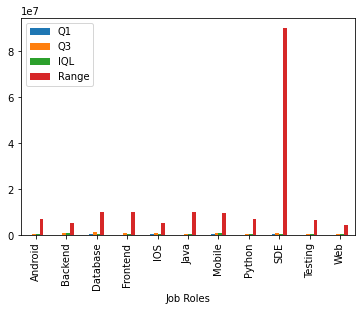

In [227]:
quantiles.plot(
    kind='bar',
    y=['Q1','Q3','IQL','Range']
)

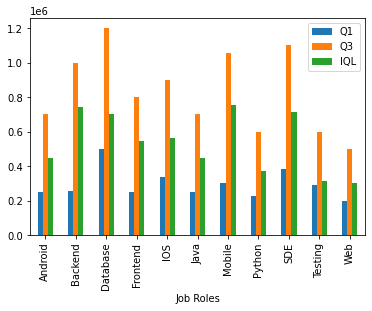

In [228]:
quantiles.plot(
    kind='bar',
    y=['Q1','Q3','IQL']
)

pada SDE terlihat nilai max nya terlalu jauh kemungkinan karna salah ketik maka perlu di bersihkan, iter 2

In [252]:
data.drop(data[data['Salary']==data['Salary'].max()].index,inplace=True)

In [254]:
data.reset_index(drop=True,inplace=True)

In [257]:
quantiles = data.groupby('Job Roles').agg(
    Q1=('Salary',q1),
    Q3=('Salary',q3),
    max=('Salary',np.max),
    min = ('Salary',np.min)
)

In [258]:
quantiles['IQL'] = quantiles['Q3']-quantiles['Q1']

In [259]:
quantiles['Range'] = quantiles['max']-quantiles['min']

In [260]:
quantiles

,Q1,Q3,max,min,IQL,Range
Job Roles,,,,,,
Android,252000.0,700000.0,7100000,12000,448000.0,7088000
Backend,255000.0,1000000.0,5200000,24000,745000.0,5176000
Database,500000.0,1200000.0,10000000,100000,700000.0,9900000
Frontend,252000.0,800000.0,10000000,12000,548000.0,9988000
IOS,336000.0,900000.0,5200000,12000,564000.0,5188000
Java,252000.0,700000.0,10000000,8448,448000.0,9991552
Mobile,300000.0,1056000.0,9600000,60000,756000.0,9540000
Python,228000.0,600000.0,6900000,24000,372000.0,6876000
SDE,384000.0,1100000.0,9850000,12000,716000.0,9838000


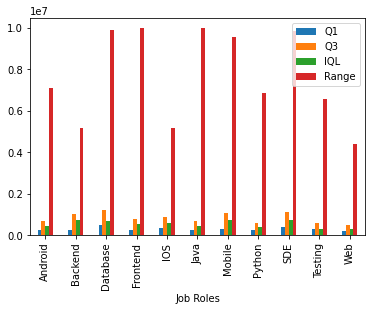

In [264]:
quantiles.plot(
    kind='bar',
    y=['Q1','Q3','IQL','Range']
)
plt.legend()

max sangat jauh terhadap min gaji shingga range nya jauh

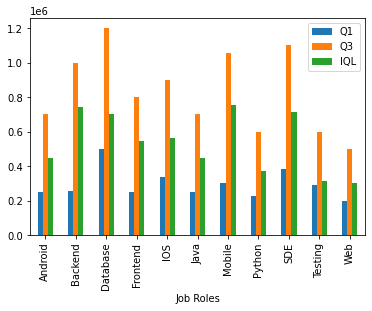

In [262]:
quantiles.plot(
    kind='bar',
    y=['Q1','Q3','IQL']
)

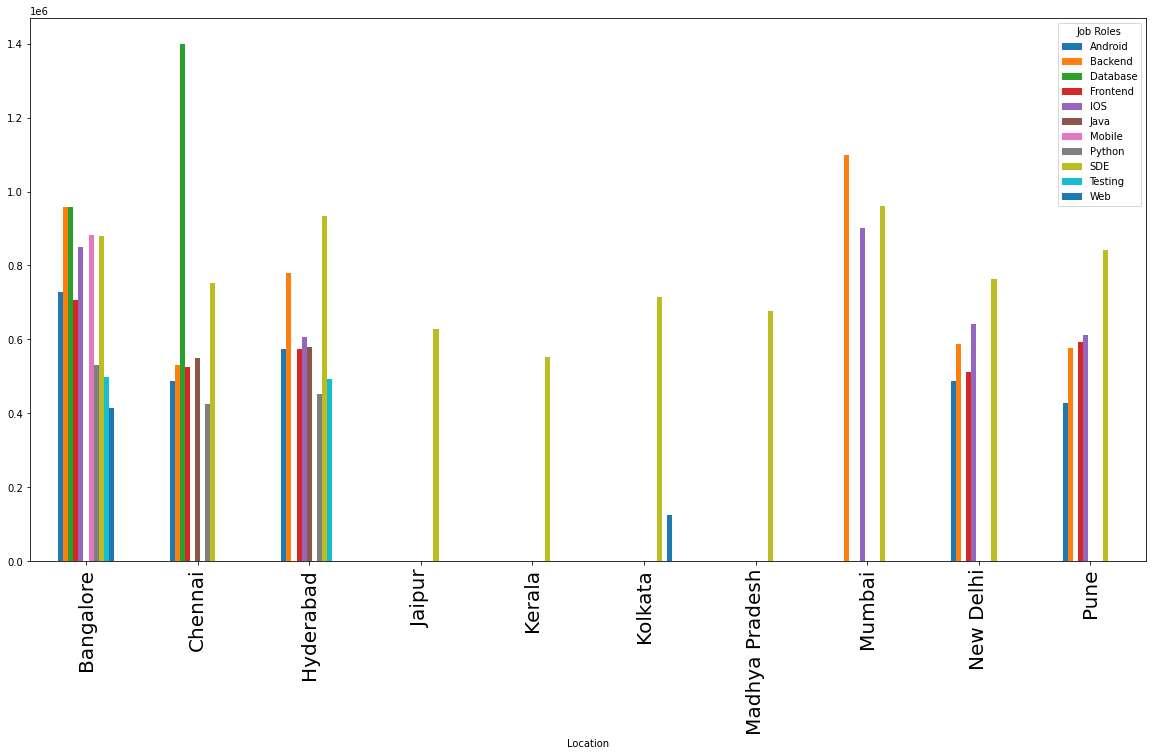

In [284]:
data.groupby(['Location','Job Roles']).mean()['Salary'].unstack().plot(
    kind='bar',
    figsize=(20,10)
)
plt.xticks(fontsize=20)
plt.show()

ada beberapa perkerjaan yang tidak dibutuhkan di beberapa kota india

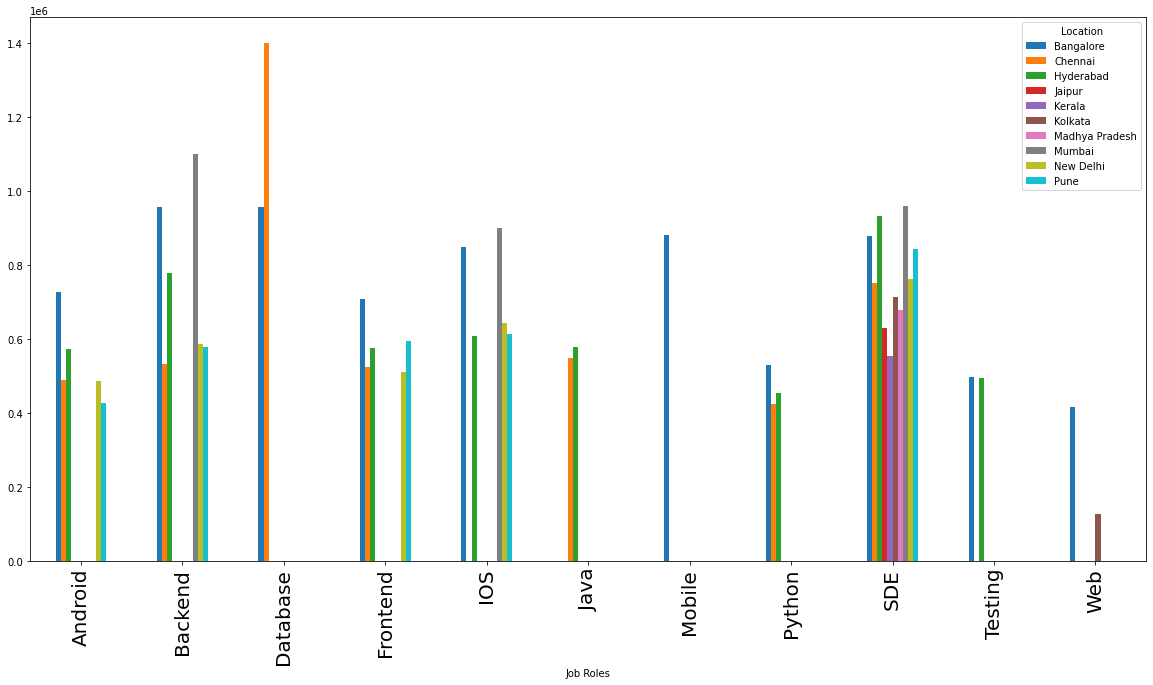

In [285]:
data.groupby(['Job Roles','Location']).mean()['Salary'].unstack().plot(
    kind='bar',
    figsize=(20,10)
)
plt.xticks(fontsize=20)
plt.show()

rata rata gaji tertinggi di chennai adalah DB bahkan lebih tinggi dibandingkan lainnya

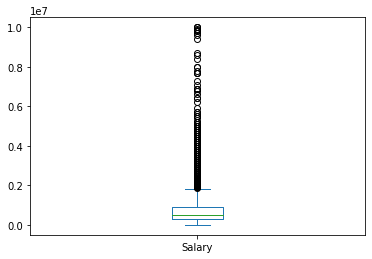

In [289]:
data['Salary'].plot(
    kind='box'
)

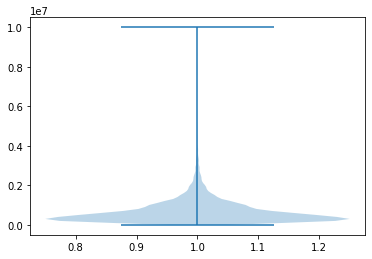

In [293]:
plt.violinplot(data['Salary'])
plt.show()

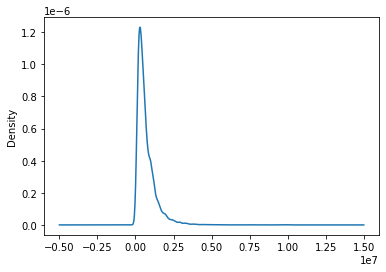

In [294]:
data['Salary'].plot(
    kind='kde'
)

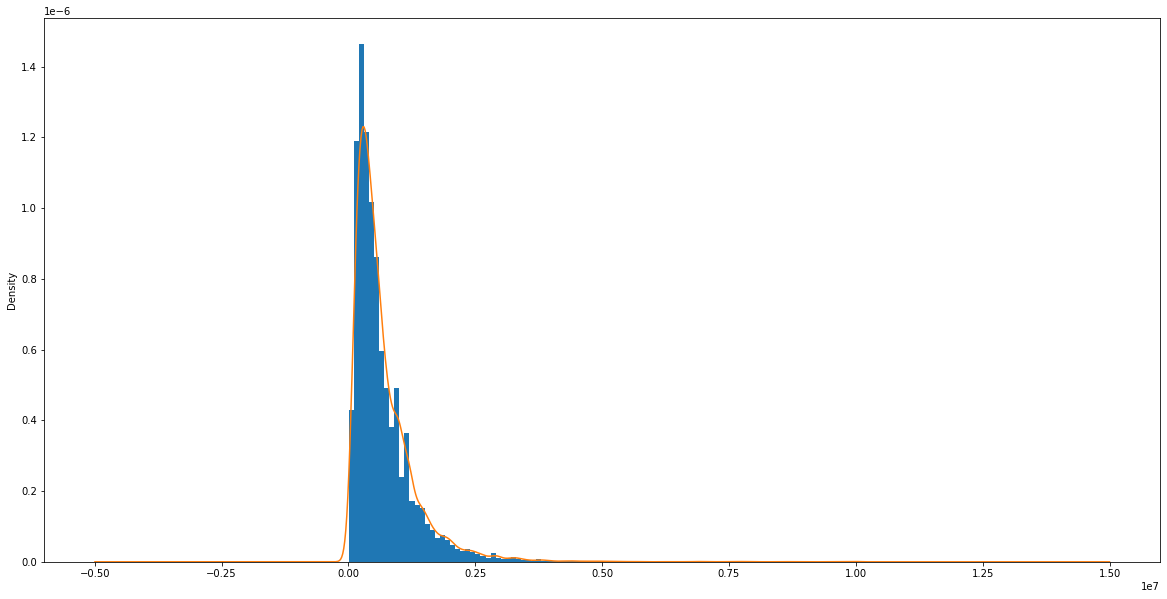

In [304]:
fig, ax = plt.subplots()
data['Salary'].plot(
    kind='hist',
    bins=100,
    ax=ax,
    density=True,
    figsize=(20,10)
)
data['Salary'].plot(
    kind='kde',
    ax=ax
)

this is not normal distribution, it's more like power law distribution

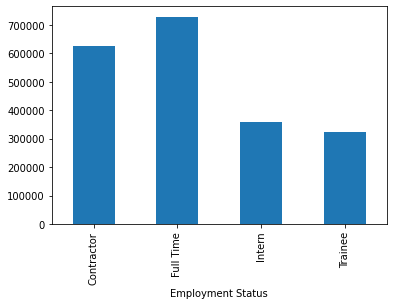

In [308]:
data.groupby('Employment Status')['Salary'].mean().plot(
    kind='bar'
)

as a fact the full time get paid more than contract and intern and trainee

In [309]:
anovaData = data.groupby('Job Roles').agg(
    mean = ('Salary','mean'),
    median=('Salary','median')
)

In [311]:
anovaData

,mean,median
Job Roles,,
Android,565911.003056,400000.0
Backend,748518.164154,500000.0
Database,958584.046243,700000.0
Frontend,610098.699954,420000.0
IOS,695254.248927,588000.0
Java,564709.907427,400000.0
Mobile,882282.971429,600000.0
Python,486022.791975,400000.0
SDE,842899.117086,660000.0


In [315]:
data = {i: data[data['Job Roles']==i]['Salary'].values for i in data['Job Roles'].unique()}

In [317]:
fvalue,pval = stats.f_oneway(
    data['Android'],
    data['Backend'],
    data['Database'],
    data['Frontend'],
    data['IOS'],
    data['Java'],
    data['Mobile'],
    data['Python'],
    data['SDE'],
    data['Testing'],
    data['Web']
)

In [321]:
if pval < 0.05:
  print('reject the null hypothesis, there is a difference among them')
else:
  print('fail to reject null hypo, there is no difference among them')

reject the null hypothesis, there is a difference among them
